In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [2]:
df = pd.read_csv(r"C:\Users\R\Desktop\MASAI\PROJECT\P2_Car price prediction model\Datasets (in csv)\raw_data.csv", index_col=0)
df.head(2)

,brand_and_model,km_driven,fuel_type,transmission,all_spec_1,all_spec_2,price
0,2018 Hyundai Elite i20 Asta 1.2 (O),34K km,· Petrol,· Manual,Mileage (ARAI)\n19.8 kmpl\nGround clearance\n1...,NaN,₹6.65 Lakh
1,2021 Hyundai Creta SX IVT Petrol,19K km,· Petrol,· Automatic,NaN,Ground clearance\n190 mm\nBoot space\n433 litr...,₹15.24 Lakh


In [3]:
df.isnull().sum()

brand_and_model    1033
km_driven            41
fuel_type          1033
transmission       1033
all_spec_1         3829
all_spec_2         3733
price              1033
dtype: int64

In [4]:
df.shape

(6480, 7)

### Dropping duplicate records

In [5]:
df[df.duplicated()].sort_values('brand_and_model')

,brand_and_model,km_driven,fuel_type,transmission,all_spec_1,all_spec_2,price
5666,2010 Maruti Suzuki Eeco 5 STR WITH A/C+HTR,34K km,· Petrol,· Manual,Mileage (ARAI)\n16.11 kmpl\nGround clearance\n...,NaN,₹1.78 Lakh
5706,2010 Maruti Suzuki Eeco 5 STR WITH A/C+HTR,34K km,· Petrol,· Manual,Mileage (ARAI)\n16.11 kmpl\nGround clearance\n...,NaN,₹1.78 Lakh
5949,2010 Maruti Suzuki Swift LXI,89K km,· Petrol,· Manual,NaN,Mileage (ARAI)\n16.1 kmpl\nGround clearance\n1...,₹2.68 Lakh
5909,2010 Maruti Suzuki Swift LXI,89K km,· Petrol,· Manual,NaN,Mileage (ARAI)\n16.1 kmpl\nGround clearance\n1...,₹2.68 Lakh
4233,2010 Nissan Micra XV Petrol,38K km,· Petrol,· Manual,NaN,Mileage (ARAI)\n18.6 kmpl\nGround clearance\n1...,₹3.25 Lakh
...,...,...,...,...,...,...,...
3298,NaN,4K km,NaN,NaN,NaN,NaN,NaN
3299,NaN,24K km,NaN,NaN,NaN,NaN,NaN
5779,NaN,77K km,NaN,NaN,NaN,NaN,NaN
5799,NaN,77K km,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(1492, 7)

# Merging the two specifications column into single one

In [8]:
df['all_spec_1'] = np.where(df['all_spec_1'].isnull(), df['all_spec_2'], df['all_spec_1'])

In [9]:
df.head()

,brand_and_model,km_driven,fuel_type,transmission,all_spec_1,all_spec_2,price
0,2018 Hyundai Elite i20 Asta 1.2 (O),34K km,· Petrol,· Manual,Mileage (ARAI)\n19.8 kmpl\nGround clearance\n1...,NaN,₹6.65 Lakh
1,2021 Hyundai Creta SX IVT Petrol,19K km,· Petrol,· Automatic,Ground clearance\n190 mm\nBoot space\n433 litr...,Ground clearance\n190 mm\nBoot space\n433 litr...,₹15.24 Lakh
2,2019 Hyundai Creta 1.6 SX,51K km,· Diesel,· Manual,Boot space\n400 litres\nSeating capacity\n5 un...,NaN,₹11.88 Lakh
3,2015 Hyundai Grand i10 Sportz 1.2 Kappa VTVT,44K km,· Petrol,· Manual,Mileage (ARAI)\n18.9 kmpl\nGround clearance\n1...,Mileage (ARAI)\n18.9 kmpl\nGround clearance\n1...,₹4.06 Lakh
4,2021 Renault Kwid 1.0 RXL,12K km,· Petrol,· Manual,Mileage (ARAI)\n21.7 kmpl\nGround clearance\n1...,NaN,₹3.75 Lakh


In [10]:
df.isnull().sum()

brand_and_model     83
km_driven           10
fuel_type           83
transmission        83
all_spec_1          98
all_spec_2         786
price               83
dtype: int64

In [11]:
df.drop('all_spec_2', axis= 1, inplace=True)

In [12]:
df.head(2)

,brand_and_model,km_driven,fuel_type,transmission,all_spec_1,price
0,2018 Hyundai Elite i20 Asta 1.2 (O),34K km,· Petrol,· Manual,Mileage (ARAI)\n19.8 kmpl\nGround clearance\n1...,₹6.65 Lakh
1,2021 Hyundai Creta SX IVT Petrol,19K km,· Petrol,· Automatic,Ground clearance\n190 mm\nBoot space\n433 litr...,₹15.24 Lakh


In [13]:
df.isnull().sum()

brand_and_model    83
km_driven          10
fuel_type          83
transmission       83
all_spec_1         98
price              83
dtype: int64

## Droping nulls / Null handling

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(1394, 6)

In [16]:
df.isnull().sum()

brand_and_model    0
km_driven          0
fuel_type          0
transmission       0
all_spec_1         0
price              0
dtype: int64

# Extracting model (year) and manufacturer from brand_&_model column

In [17]:
df['model'] = df['brand_and_model'].apply(lambda x: int(x[:4]))

In [18]:
df['brand_and_model'] = df['brand_and_model'].apply(lambda x: x[5:])

In [19]:
df.rename(columns={'brand_and_model':'brand'}, inplace=True)

In [20]:
df.head(2)

,brand,km_driven,fuel_type,transmission,all_spec_1,price,model
0,Hyundai Elite i20 Asta 1.2 (O),34K km,· Petrol,· Manual,Mileage (ARAI)\n19.8 kmpl\nGround clearance\n1...,₹6.65 Lakh,2018
1,Hyundai Creta SX IVT Petrol,19K km,· Petrol,· Automatic,Ground clearance\n190 mm\nBoot space\n433 litr...,₹15.24 Lakh,2021


In [21]:
df.model.unique()

array([2018, 2021, 2019, 2015, 2016, 2020, 2011, 2012, 2017, 2014, 2013,
       2022, 2010, 2023, 2009], dtype=int64)

In [22]:
car_brands = ['Audi','Bentley','BMW','Bugatti','Chevrolet','Datsun','Ferrari','Fiat','Ford','Honda','Hyundai','Jaguar','Jeep','Kia',
              'Lamborghini','Land Rover','Mahindra','Maruti','Mercedes-Benz','MG','Mitsubishi','Nissan','Porsche','Renault','Rolls-Royce',
              'SEAT','Skoda','Suzuki','Tata','Tesla','Toyota','Volkswagen','Volvo']

In [23]:
def manufacturer(x):
    x = x.split()
    for i in x:
        if i in car_brands:
            return i
        else:
            pass

In [24]:
manufacturer(df.iloc[0,0])

'Hyundai'

In [25]:
df['manufacturer'] = df['brand'].apply(lambda x: manufacturer(x))

In [26]:
df.head()

,brand,km_driven,fuel_type,transmission,all_spec_1,price,model,manufacturer
0,Hyundai Elite i20 Asta 1.2 (O),34K km,· Petrol,· Manual,Mileage (ARAI)\n19.8 kmpl\nGround clearance\n1...,₹6.65 Lakh,2018,Hyundai
1,Hyundai Creta SX IVT Petrol,19K km,· Petrol,· Automatic,Ground clearance\n190 mm\nBoot space\n433 litr...,₹15.24 Lakh,2021,Hyundai
2,Hyundai Creta 1.6 SX,51K km,· Diesel,· Manual,Boot space\n400 litres\nSeating capacity\n5 un...,₹11.88 Lakh,2019,Hyundai
3,Hyundai Grand i10 Sportz 1.2 Kappa VTVT,44K km,· Petrol,· Manual,Mileage (ARAI)\n18.9 kmpl\nGround clearance\n1...,₹4.06 Lakh,2015,Hyundai
4,Renault Kwid 1.0 RXL,12K km,· Petrol,· Manual,Mileage (ARAI)\n21.7 kmpl\nGround clearance\n1...,₹3.75 Lakh,2021,Renault


In [27]:
df['manufacturer'].replace('Maruti',"Maruti Suzuki", inplace=True)

In [28]:
df.manufacturer.unique()

array(['Hyundai', 'Renault', 'Maruti Suzuki', 'Toyota', 'Ford', 'Kia',
       'Skoda', 'Mahindra', 'Volkswagen', 'Honda', 'Tata', 'Chevrolet',
       'Nissan', 'MG', 'Datsun', 'Jeep'], dtype=object)

# Cleaning fuel_type and transmission columns

In [29]:
def clean(x):
    x = x[3:]
    return x

In [30]:
df['fuel_type'] = df['fuel_type'].apply(lambda x: clean(x))

In [31]:
df['transmission'] = df['transmission'].apply(lambda x: clean(x))

In [32]:
df.head(2)

,brand,km_driven,fuel_type,transmission,all_spec_1,price,model,manufacturer
0,Hyundai Elite i20 Asta 1.2 (O),34K km,Petrol,Manual,Mileage (ARAI)\n19.8 kmpl\nGround clearance\n1...,₹6.65 Lakh,2018,Hyundai
1,Hyundai Creta SX IVT Petrol,19K km,Petrol,Automatic,Ground clearance\n190 mm\nBoot space\n433 litr...,₹15.24 Lakh,2021,Hyundai


# Cleaning km_driven column

In [33]:
df.km_driven.unique()

array(['34K km', '19K km', '51K km', '44K km', '12K km', '17K km',
       '56K km', '10K km', '50K km', '45K km', '96K km', '65K km',
       '60K km', '87K km', '39K km', '7K km', '18K km', '25K km',
       '46K km', '63K km', '98K km', '41K km', '26K km', '11K km',
       '59K km', '47K km', '80K km', '40K km', '74K km', '24K km',
       '33K km', '90K km', '77K km', '48K km', '38K km', '27K km',
       '29K km', '66K km', '14K km', '31K km', '58K km', '49K km',
       '13K km', '53K km', '35K km', '15K km', '79K km', '75K km',
       '73K km', '52K km', '20K km', '100K km', '43K km', '54K km',
       '81K km', '36K km', '89K km', '37K km', '70K km', '97K km',
       '22K km', '57K km', '21K km', '23K km', '61K km', '72K km',
       '76K km', '86K km', '28K km', '42K km', '99K km', '88K km',
       '55K km', '62K km', '16K km', '95K km', '82K km', '78K km',
       '6K km', '32K km', '67K km', '91K km', '71K km', '83K km',
       '64K km', '84K km', '92K km', '85K km', '69K km', '30K k

In [34]:
def driven(x):
    x = int(x.replace(x[-4:], ""))
    return x

In [35]:
a = "26K km"

In [36]:
driven(a)

26

In [37]:
df['km_driven'] = df['km_driven'].apply(lambda x: driven(x))

In [38]:
df = df.rename(columns = {'km_driven':'km_driven_(in_thousands)'})

In [39]:
df.head(2)

,brand,km_driven_(in_thousands),fuel_type,transmission,all_spec_1,price,model,manufacturer
0,Hyundai Elite i20 Asta 1.2 (O),34,Petrol,Manual,Mileage (ARAI)\n19.8 kmpl\nGround clearance\n1...,₹6.65 Lakh,2018,Hyundai
1,Hyundai Creta SX IVT Petrol,19,Petrol,Automatic,Ground clearance\n190 mm\nBoot space\n433 litr...,₹15.24 Lakh,2021,Hyundai


# Cleaning price column

In [40]:
df.price.unique()

array(['₹6.65 Lakh', '₹15.24 Lakh', '₹11.88 Lakh', '₹4.06 Lakh',
       '₹3.75 Lakh', '₹7.93 Lakh', '₹5.78 Lakh', '₹7.45 Lakh',
       '₹10.98 Lakh', '₹2.72 Lakh', '₹2.86 Lakh', '₹6.76 Lakh',
       '₹2.93 Lakh', '₹3.69 Lakh', '₹2.60 Lakh', '₹7.27 Lakh',
       '₹13.26 Lakh', '₹11.45 Lakh', '₹6.48 Lakh', '₹3.41 Lakh',
       '₹4.34 Lakh', '₹6.72 Lakh', '₹6.18 Lakh', '₹6.99 Lakh',
       '₹11.97 Lakh', '₹9.70 Lakh', '₹6.95 Lakh', '₹7.79 Lakh',
       '₹5.90 Lakh', '₹5.64 Lakh', '₹5.40 Lakh', '₹4.98 Lakh',
       '₹4.03 Lakh', '₹3.92 Lakh', '₹2.42 Lakh', '₹2.18 Lakh',
       '₹3.81 Lakh', '₹5.66 Lakh', '₹5.52 Lakh', '₹5.54 Lakh',
       '₹4.59 Lakh', '₹7.29 Lakh', '₹7.58 Lakh', '₹5.72 Lakh',
       '₹4.11 Lakh', '₹5.37 Lakh', '₹4.95 Lakh', '₹6.68 Lakh',
       '₹13.45 Lakh', '₹12.20 Lakh', '₹14.19 Lakh', '₹6.22 Lakh',
       '₹20.15 Lakh', '₹4.54 Lakh', '₹8.43 Lakh', '₹10.17 Lakh',
       '₹16.20 Lakh', '₹15.73 Lakh', '₹9.41 Lakh', '₹4.84 Lakh',
       '₹3.95 Lakh', '₹7.23 Lakh', '₹4.17 

In [41]:
def price(x):
    x = x[1:].split()[0]
    return float(x)

In [42]:
# def price(x):
#     x = re.sub("[^0-9.]","", x)
#     return float(x)

In [43]:
df['price'] = df['price'].apply(lambda x: price(x))

In [44]:
df.head(2)

,brand,km_driven_(in_thousands),fuel_type,transmission,all_spec_1,price,model,manufacturer
0,Hyundai Elite i20 Asta 1.2 (O),34,Petrol,Manual,Mileage (ARAI)\n19.8 kmpl\nGround clearance\n1...,6.65,2018,Hyundai
1,Hyundai Creta SX IVT Petrol,19,Petrol,Automatic,Ground clearance\n190 mm\nBoot space\n433 litr...,15.24,2021,Hyundai


In [45]:
df.dtypes

brand                        object
km_driven_(in_thousands)      int64
fuel_type                    object
transmission                 object
all_spec_1                   object
price                       float64
model                         int64
manufacturer                 object
dtype: object

# Finally, working on specifications column

In [46]:
df.rename(columns={'all_spec_1': 'specifications'}, inplace=True)

In [47]:
a = df.iloc[0,4]
a

'Mileage (ARAI)\n19.8 kmpl\nGround clearance\n170 mm\nBoot space\n285 litres\nSeating capacity\n5 units\nFuel tank capacity\n45 litres\nMax power\n82 bhp\nVIEW ALL SPECIFICATIONS'

In [48]:
b = 'Mileage (ARAI)\n17 kmpl\nGround clearance\n205 mm\nSeating capacity\n5 units\nFuel tank capacity\n50 litres\nMax power\n138 bhp\nVIEW ALL SPECIFICATIONS'

In [49]:
a.split("\n")

['Mileage (ARAI)',
 '19.8 kmpl',
 'Ground clearance',
 '170 mm',
 'Boot space',
 '285 litres',
 'Seating capacity',
 '5 units',
 'Fuel tank capacity',
 '45 litres',
 'Max power',
 '82 bhp',
 'VIEW ALL SPECIFICATIONS']

In [50]:
def spec(x):
    x = x.split("\n")
    ls = ['Mileage (ARAI)', 'Ground clearance', 'Boot space', 'Seating capacity', 'Fuel tank capacity', 'Max power']
    for i in ls:
        if i == "Mileage (ARAI)":
            try:
                mileage = x[x.index(i)+1]
            except:
                mileage = np.nan
        elif i == 'Ground clearance':
            try:
                ground_clearance = x[x.index(i)+1]
            except:
                ground_clearance = np.nan
        elif i == 'Boot space':
            try:
                boot_space = x[x.index(i)+1]
            except:
                boot_space = np.nan
        elif i == 'Seating capacity':
            try:
                seating_capacity = x[x.index(i)+1]
            except:
                seating_capacity = np.nan
        elif i == 'Fuel tank capacity':
            try:
                fuel_tank_capacity = x[x.index(i)+1]
            except:
                fuel_tank_capacity = np.nan
        elif i == 'Max power':
            try:
                max_power = x[x.index(i)+1]
            except:
                max_power = np.nan
                
    return mileage, ground_clearance, boot_space, seating_capacity, fuel_tank_capacity, max_power

In [51]:
spec(a)

('19.8 kmpl', '170 mm', '285 litres', '5 units', '45 litres', '82 bhp')

In [52]:
spec(b)

('17 kmpl', '205 mm', nan, '5 units', '50 litres', '138 bhp')

In [53]:
df[['mileage', 'ground_clearance', 'boot_space', 'seating_capacity', 'fuel_tank_capacity', 'max_power']] = df['specifications'].apply(lambda x: pd.Series(spec(x)))

In [54]:
df.isnull().sum()

brand                         0
km_driven_(in_thousands)      0
fuel_type                     0
transmission                  0
specifications                0
price                         0
model                         0
manufacturer                  0
mileage                      90
ground_clearance            153
boot_space                  247
seating_capacity             25
fuel_tank_capacity           28
max_power                   211
dtype: int64

**Firstly, these new columns will be cleaned & assigned proper dtype, then imputation will be done (basically let's not drop them)**

In [55]:
df.shape

(1394, 14)

In [56]:
df.drop('specifications', axis=1, inplace=True)

# Cleaning/Preparing the specification columns like mileage, boot space, etc

In [57]:
df.head(2)

,brand,km_driven_(in_thousands),fuel_type,transmission,price,model,manufacturer,mileage,ground_clearance,boot_space,seating_capacity,fuel_tank_capacity,max_power
0,Hyundai Elite i20 Asta 1.2 (O),34,Petrol,Manual,6.65,2018,Hyundai,19.8 kmpl,170 mm,285 litres,5 units,45 litres,82 bhp
1,Hyundai Creta SX IVT Petrol,19,Petrol,Automatic,15.24,2021,Hyundai,NaN,190 mm,433 litres,5 units,50 litres,NaN


In [58]:
specifications = ['mileage', 'ground_clearance', 'boot_space', 'seating_capacity', 'fuel_tank_capacity', 'max_power']

In [59]:
def magnitude(x):
    x = x.split()[0]
    return x

In [60]:
for i in specifications:
    df[i] = df[i].apply(lambda x: magnitude(x) if isinstance(x, str) else x)

In [61]:
df.head(2)

,brand,km_driven_(in_thousands),fuel_type,transmission,price,model,manufacturer,mileage,ground_clearance,boot_space,seating_capacity,fuel_tank_capacity,max_power
0,Hyundai Elite i20 Asta 1.2 (O),34,Petrol,Manual,6.65,2018,Hyundai,19.8,170,285,5,45,82
1,Hyundai Creta SX IVT Petrol,19,Petrol,Automatic,15.24,2021,Hyundai,NaN,190,433,5,50,NaN


In [62]:
for i in specifications:
    df[i] = pd.to_numeric(df[i], errors = 'coerce')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1394 entries, 0 to 6479
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     1394 non-null   object 
 1   km_driven_(in_thousands)  1394 non-null   int64  
 2   fuel_type                 1394 non-null   object 
 3   transmission              1394 non-null   object 
 4   price                     1394 non-null   float64
 5   model                     1394 non-null   int64  
 6   manufacturer              1394 non-null   object 
 7   mileage                   1304 non-null   float64
 8   ground_clearance          1240 non-null   float64
 9   boot_space                1147 non-null   float64
 10  seating_capacity          1369 non-null   float64
 11  fuel_tank_capacity        1366 non-null   float64
 12  max_power                 1183 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 152.5+ KB


## Imputation

### Now handling the missing values in specifications columns

C:\Users\R\AppData\Local\Temp\ipykernel_3264\2243265471.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


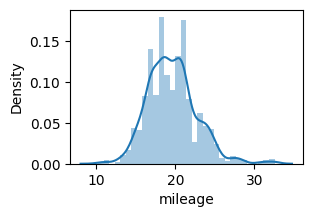

C:\Users\R\AppData\Local\Temp\ipykernel_3264\2243265471.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


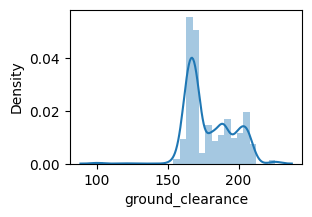

C:\Users\R\AppData\Local\Temp\ipykernel_3264\2243265471.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


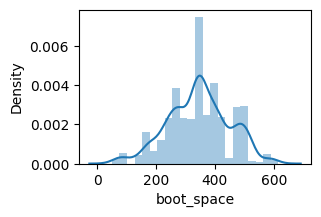

C:\Users\R\AppData\Local\Temp\ipykernel_3264\2243265471.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


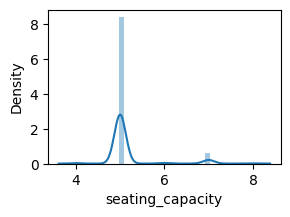

C:\Users\R\AppData\Local\Temp\ipykernel_3264\2243265471.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


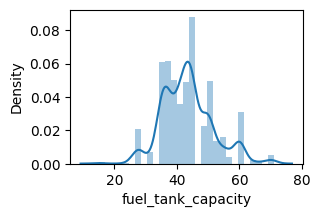

C:\Users\R\AppData\Local\Temp\ipykernel_3264\2243265471.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


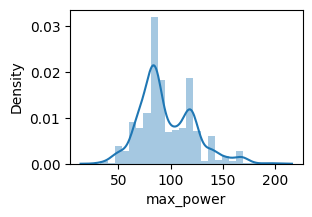

In [64]:
for i in specifications:
#     sns.displot(df[i], height=3,aspect=2)
    plt.figure(figsize=(3,2))
    sns.distplot(df[i])
    plt.xlabel(i)
    plt.show()

In [65]:
# for i in specifications:
# #     sns.displot(df[i], height=3,aspect=2)
#     plt.figure(figsize=(3,2))
#     df[i].plot(kind='kde')
#     plt.xlabel(i)
#     plt.show()

### Normal Probability Plot (Q-Q Plot)

In [66]:
# import statsmodels.api as sm

In [67]:
# for i in specifications:
#     plt.figure(figsize=(3,2))
#     sm.qqplot(df[i], line='s')
#     plt.title(i)
#     plt.show()

In [68]:
for i in specifications:
    if i == 'seating_capacity':
        df[i] = df[i].fillna(df[i].mode()[0])
    else:
        df[i] = df[i].fillna(df[i].median())

In [69]:
df.isnull().sum()

brand                       0
km_driven_(in_thousands)    0
fuel_type                   0
transmission                0
price                       0
model                       0
manufacturer                0
mileage                     0
ground_clearance            0
boot_space                  0
seating_capacity            0
fuel_tank_capacity          0
max_power                   0
dtype: int64

In [70]:
df

,brand,km_driven_(in_thousands),fuel_type,transmission,price,model,manufacturer,mileage,ground_clearance,boot_space,seating_capacity,fuel_tank_capacity,max_power
0,Hyundai Elite i20 Asta 1.2 (O),34,Petrol,Manual,6.65,2018,Hyundai,19.800,170.0,285.0,5.0,45.0,82.00
1,Hyundai Creta SX IVT Petrol,19,Petrol,Automatic,15.24,2021,Hyundai,19.365,190.0,433.0,5.0,50.0,88.51
2,Hyundai Creta 1.6 SX,51,Diesel,Manual,11.88,2019,Hyundai,19.365,170.0,400.0,5.0,55.0,126.00
3,Hyundai Grand i10 Sportz 1.2 Kappa VTVT,44,Petrol,Manual,4.06,2015,Hyundai,18.900,165.0,350.0,5.0,43.0,81.00
4,Renault Kwid 1.0 RXL,12,Petrol,Manual,3.75,2021,Renault,21.700,184.0,279.0,5.0,28.0,67.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,Maruti Suzuki Alto K10 LXI,60,Petrol,Manual,2.04,2012,Maruti Suzuki,20.920,160.0,350.0,5.0,35.0,67.10
6476,Renault Duster RXS Sandstorm edition 110PS,70,Diesel,Manual,8.49,2017,Renault,19.365,170.0,350.0,5.0,43.0,88.51
6477,Maruti Suzuki Ciaz Delta Petrol,18,Petrol,Manual,8.34,2020,Maruti Suzuki,20.650,170.0,510.0,5.0,43.0,103.25
6478,Maruti Suzuki Wagon R 1.0 LXI,40,Petrol,Manual,3.40,2013,Maruti Suzuki,18.900,165.0,180.0,5.0,35.0,67.10


In [71]:
df.rename(columns={'km_driven_(in_thousands)':'km driven (in thousands)','price':'price (in ₹)', 'model':'model (year)',
                   'mileage':'mileage (in kmpl)', 'ground_clearance':'ground clearance (in mm)',
                   'boot_space':'boot space (in litres)', 'seating_capacity':'seating capacity (units)',
                   'fuel_tank_capacity':'fuel tank capacity (in litres)', 'max_power':'max power (in bhp)'}, inplace=True)

In [72]:
df.head(2)

,brand,km driven (in thousands),fuel_type,transmission,price (in ₹),model (year),manufacturer,mileage (in kmpl),ground clearance (in mm),boot space (in litres),seating capacity (units),fuel tank capacity (in litres),max power (in bhp)
0,Hyundai Elite i20 Asta 1.2 (O),34,Petrol,Manual,6.65,2018,Hyundai,19.800,170.0,285.0,5.0,45.0,82.00
1,Hyundai Creta SX IVT Petrol,19,Petrol,Automatic,15.24,2021,Hyundai,19.365,190.0,433.0,5.0,50.0,88.51


In [73]:
df = df[['manufacturer','brand','model (year)','km driven (in thousands)','mileage (in kmpl)','seating capacity (units)', 'fuel_type', 'transmission', "ground clearance (in mm)", "boot space (in litres)", "fuel tank capacity (in litres)", "max power (in bhp)", "price (in ₹)"]]

In [74]:
df.head(2)

,manufacturer,brand,model (year),km driven (in thousands),mileage (in kmpl),seating capacity (units),fuel_type,transmission,ground clearance (in mm),boot space (in litres),fuel tank capacity (in litres),max power (in bhp),price (in ₹)
0,Hyundai,Hyundai Elite i20 Asta 1.2 (O),2018,34,19.800,5.0,Petrol,Manual,170.0,285.0,45.0,82.00,6.65
1,Hyundai,Hyundai Creta SX IVT Petrol,2021,19,19.365,5.0,Petrol,Automatic,190.0,433.0,50.0,88.51,15.24


In [75]:
# df.to_csv('analysis-and-model.csv',index=False)

This file will be used for analysing and drawing insights using Excel & SQL and finally for building a Linear Regression model for prediction of prices of used cars in India.